In [18]:
!pip install -q deep_autoviml

In [19]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

Used flower image dataset from [dataset_url](https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz)

```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls '/content/gdrive/My Drive/SEM4/297DL/hw4/data/flower_photos'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
test  train


In [21]:
target = 'image' ### It doesn't matter what name you give for image target
image_dir = '/content/gdrive/My Drive/SEM4/297DL/hw4/data/flower_photos'
img_height = 224
img_width = 224
img_channels = 3

In [22]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 5}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }


    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/gdrive/My Drive/SEM4/297DL/hw4/data/flower_photos
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/gdrive/My Drive/SEM4/297DL/hw4/data/flower_photos. Returning...
Found 450 files belonging to 5 classes.

Splitting train into two: train and validation data
Number of image classes = 5 and they are: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Training image model. This will take time...
Epoch 1/5
4/4 [==============================] - 14s 2s/step - loss: 1.7873 - accuracy: 0.3144 - val_loss: 1.3696 - val_accuracy: 0.4375
Epoch 2/5
4/4 [==============================] - 7s 2s/step - loss: 1.4995 - accuracy: 0.4175 - val_loss: 1.2085 - val_accuracy: 0.4766
Epoch 3/5
4/4 [==============================] - 7s 2s/step - loss: 1.2571 - accuracy: 0.4948 -

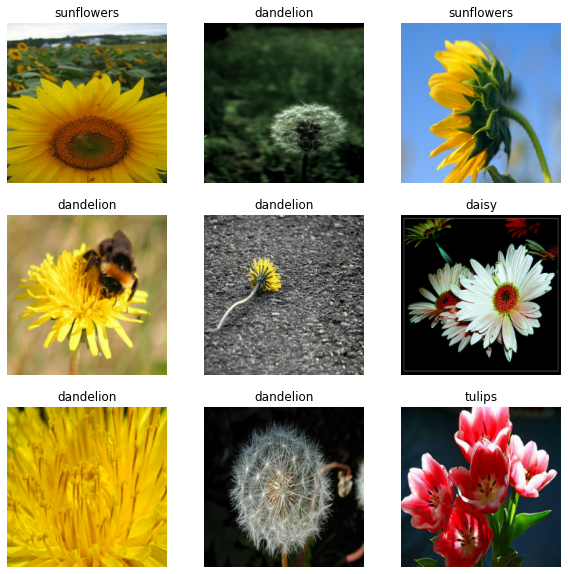

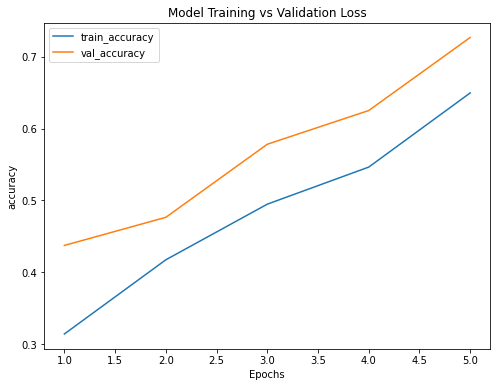

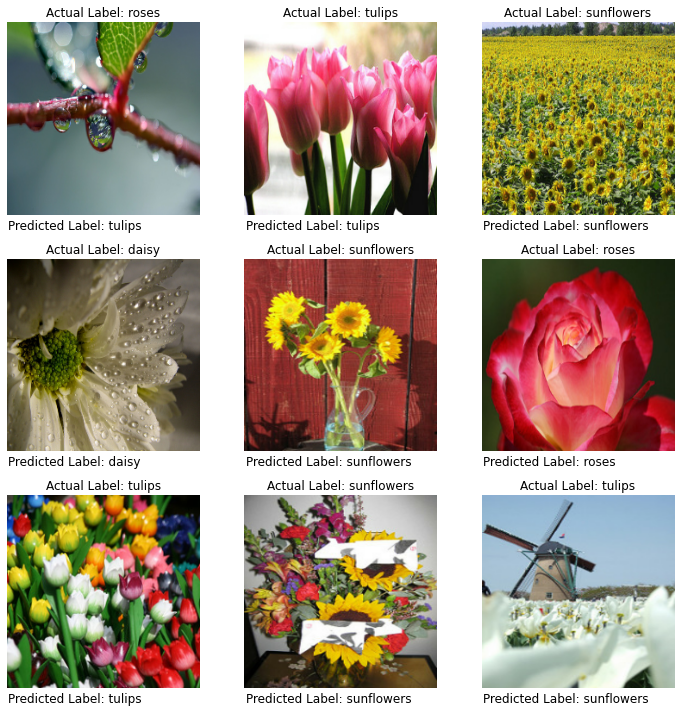

In [23]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='flower',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

In [24]:
test_image_dir = image_dir + '/test'
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f2521b44e50> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f2521b44e50> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/gdrive/My Drive/SEM4/297DL/hw4/data/flower_photos/test
Found 50 files belonging to 5 classes.
    Sample predictions before inverse_transform: [4 4 3 4 3]
    Sample predictions after inverse_transform: ['tulips' 'tulips' 'sunflowers' 'tulips' 'sunflowers']
